# Multiple linear regression


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
cars = pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [5]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [6]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Relationship between variables along with histograms

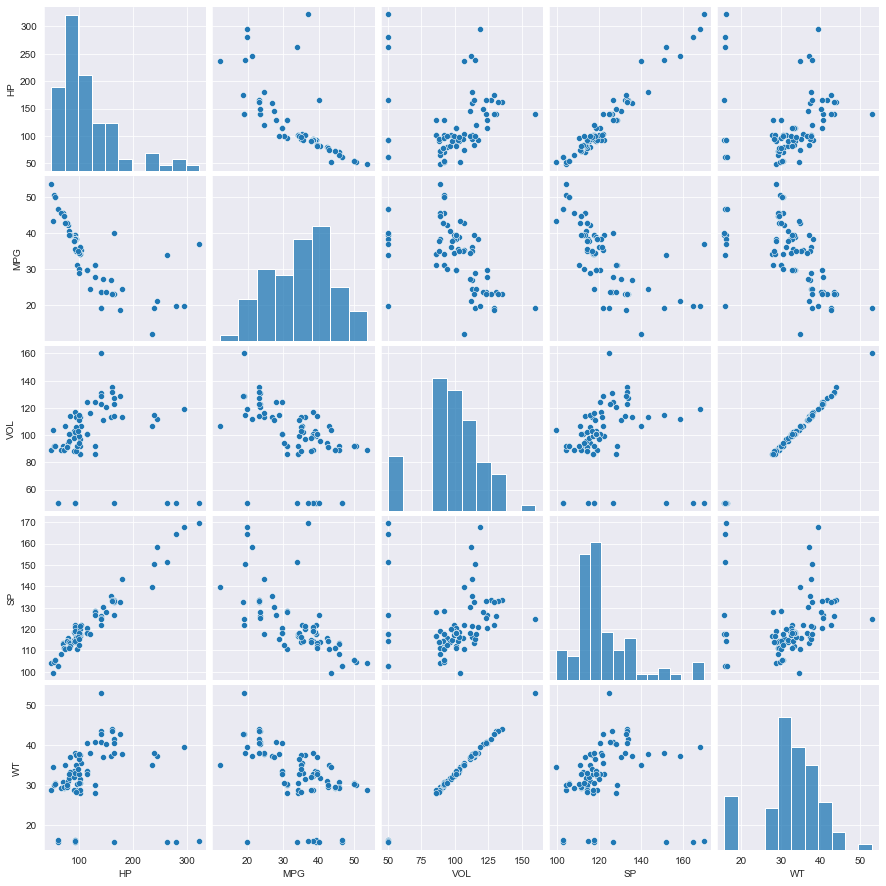

In [7]:
#Format the plot background and scatter plots for all the variables
# Pairplot

sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Building a model

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP', data= cars).fit()

In [9]:
#model parameter
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [10]:
#model.pvalues

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.54e-23
Time:                        12:41:12   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
(model.rsquared, model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

In [13]:
# NOTE: There is a multicollinearity btn WT and VOL so cross check

# Simple linear regression models 

In [14]:
# TEST 1 
slrvol =smf.ols('MPG~VOL', data=cars).fit()
print(slrvol.pvalues, '\n' , slrvol.tvalues)
#slrvol.summary()

Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64 
 Intercept    14.106056
VOL          -5.541400
dtype: float64


In [15]:
slrwt =smf.ols('MPG~WT', data=cars).fit()
print(slrwt.pvalues, '\n' , slrwt.tvalues)
#slrwt.summary()

Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64 
 Intercept    14.248923
WT           -5.508067
dtype: float64


In [16]:
slrvw =smf.ols('MPG~WT+VOL', data=cars).fit()
print(slrvw.pvalues, '\n' , slrvw.tvalues)
#slrvw.summary()

Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64 
 Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64


# Calculating Variation Inflation Factor

In [17]:
#THUMB RULE : VIF values should be less
# get R**2 and app VIF formula : 1/(1-r**2)

rsq_vol = smf.ols('VOL~WT+HP+SP', data= cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_wt = smf.ols('WT~VOL+HP+SP', data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_hp = smf.ols('HP~VOL+SP+WT', data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_sp = smf.ols('SP~VOL+HP+WT', data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing values in DataFrame
d1 = {'Variables':['VOL','WT','HP','SP'], 'VIF': [vif_vol,vif_wt,vif_hp,vif_sp]}
vif_frame= pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,VOL,638.806084
1,WT,639.533818
2,HP,19.926589
3,SP,20.007639


# Residual analysis

In [18]:
#MODEL VALIDATION TECHNIQUE
# 1.Q-Q PLOT
# 2. RESIDUAL PLOT 
# 3. REGRESSOR VS RESIDUAL PLOT

# 1. Test for Normality of Residuals(Q-Q plot) 

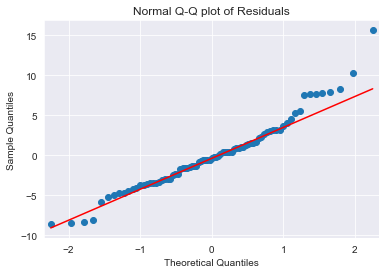

In [19]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [20]:
#finding outlier/Highly influential point

list= (np.where(model.resid>10))
list

(array([ 0, 76], dtype=int64),)

# 2. Residual plot for HOMOSCEDASTICITY

In [21]:
# STANDARDIZING THE VALUES OF PREDICTED VALUES(FITTED) AND RESIDUALS

def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

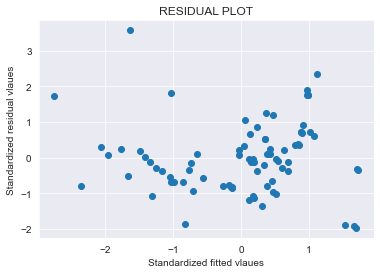

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
          get_standardized_values(model.resid))

plt.title('RESIDUAL PLOT')
plt.xlabel('Standardized fitted vlaues')
plt.ylabel('Standardized residual vlaues')
plt.show()

# 3. Residual vs Regressor

eval_env: 1


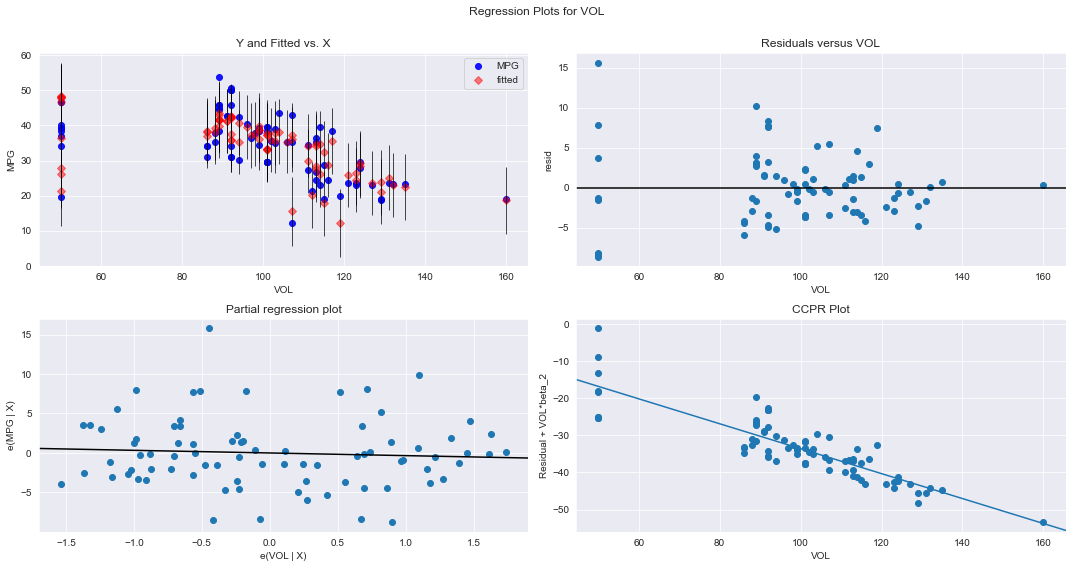

In [23]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

In [24]:
#fig = plt.figure(figsize=(15,8))
#fig= sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
#plt.show()

eval_env: 1


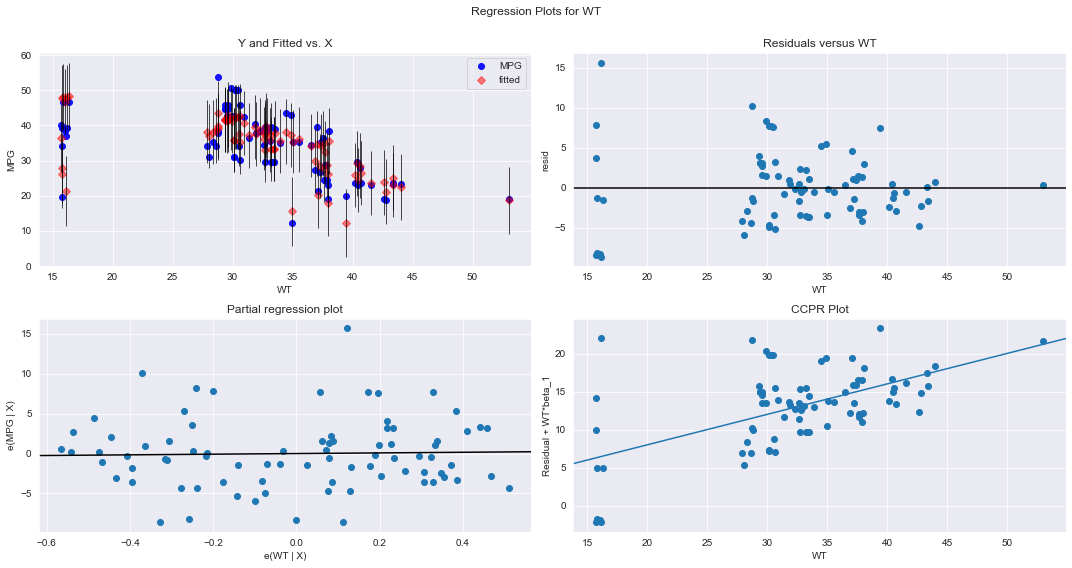

In [25]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

In [26]:
#fig = plt.figure(figsize=(15,8))
#fig= sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
#plt.show()

# MODEL DELETION TECHNIQUES
## Detecting influencers/outliers

In [27]:
# 1.COOK'S DISTANCE
# 2.LEVARAGE VALUE METHOD

# 1. COOK'S DISTANCE

In [28]:
model_influence= model.get_influence()
(c,_)= model_influence.cooks_distance

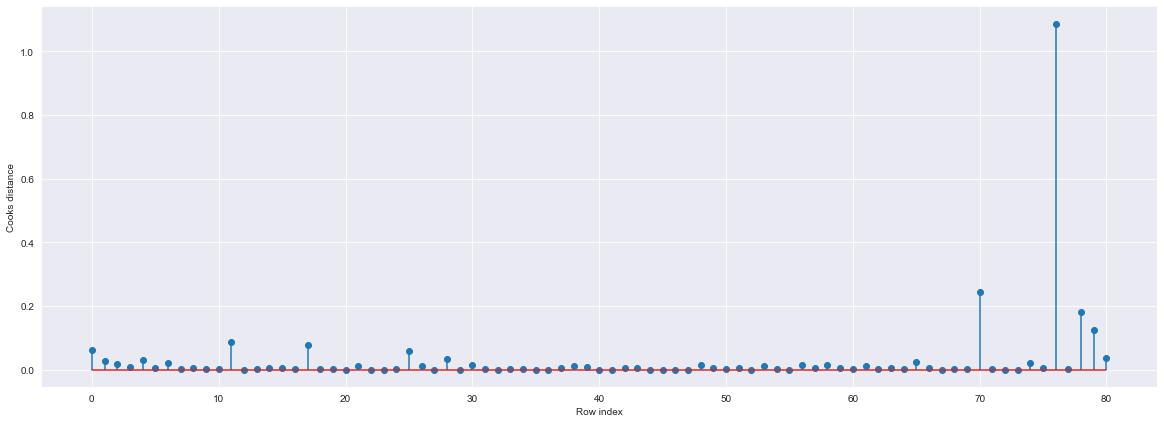

In [29]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [30]:
(np.argmax(c),np.max(c))

(76, 1.0865193998180098)

# 2. Leverage value method

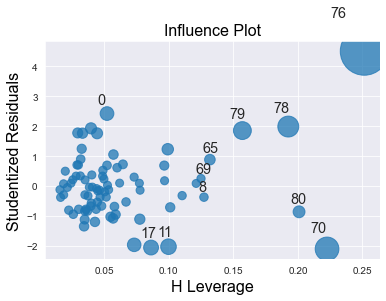

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [32]:
#levearge cutoff calc

k = 4
n= cars.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.18518518518518517

In [33]:
# check for values in 70 and 76th record
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [34]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improve the model 
### By droping the high influencing points

In [106]:
import warnings
warnings.filterwarnings('ignore')

cars.new =pd.read_csv('Cars.csv')

In [107]:
#Discard the data points which are influencers and reasign the row number (reset_index())

car1 = cars.new.drop(cars.new.index[[70,76]], axis=0).reset_index()

In [37]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [38]:
#To remove the index
#car1= car1.drop(['index'], axis=1)
#car1

# Build a model
### By droping 'WT' 

In [39]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [40]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.bic)

(0.8161692010376007, 446.11722639447726, 455.59501780434533)

### By droping 'VOL'

In [41]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [42]:
(final_ml_W.rsquared,final_ml_W.aic,final_ml_W.bic)

(0.8160034320495304, 446.1884323575032, 455.66622376737126)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [44]:
model_influence_v = final_ml_V.get_influence()
(c_v,_)= model_influence_v.cooks_distance

Text(0, 0.5, 'cooks distance')

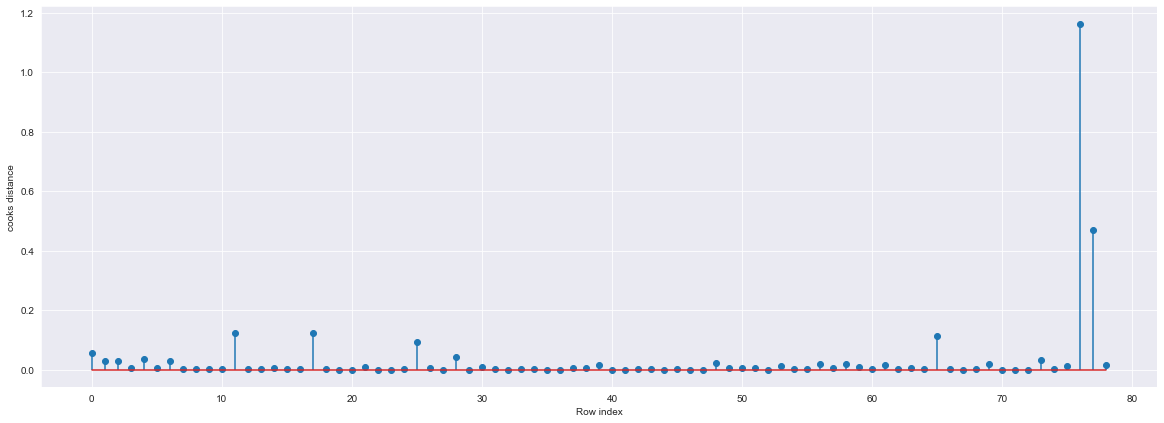

In [46]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')

In [48]:
(np.argmax(c_v),np.max(c_v))

(76, 1.1629387469135095)

In [50]:
 #droping 76 again
car2=car1.drop(car1.index[[76]],axis = 0)

In [68]:
car2.shape
car2

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
73,74,140,19.086341,129,121.864163,42.618698
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
77,79,295,19.833733,119,167.944460,39.423099


In [83]:
car3=car2.reset_index()
car3

,level_0,index,HP,MPG,VOL,SP,WT
0,0,0,49,53.700681,89,104.185353,28.762059
1,1,1,55,50.013401,92,105.461264,30.466833
2,2,2,55,50.013401,92,105.461264,30.193597
3,3,3,70,45.696322,92,113.461264,30.632114
4,4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...,...
73,73,74,140,19.086341,129,121.864163,42.618698
74,74,75,175,18.762837,129,132.864163,42.778219
75,75,77,238,19.197888,115,150.576579,37.923113
76,77,79,295,19.833733,119,167.944460,39.423099


In [85]:
car4=car3.drop(['index','level_0'],axis=1)

In [86]:
car4


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


In [87]:
#BUILD THE MODEL ON NEW DATA
final_ml_V = smf.ols('MPG~VOL+HP+SP', data=car4).fit()

In [88]:
model_influence_v = final_ml_V.get_influence()
(c_v,_)= model_influence_v.cooks_distance

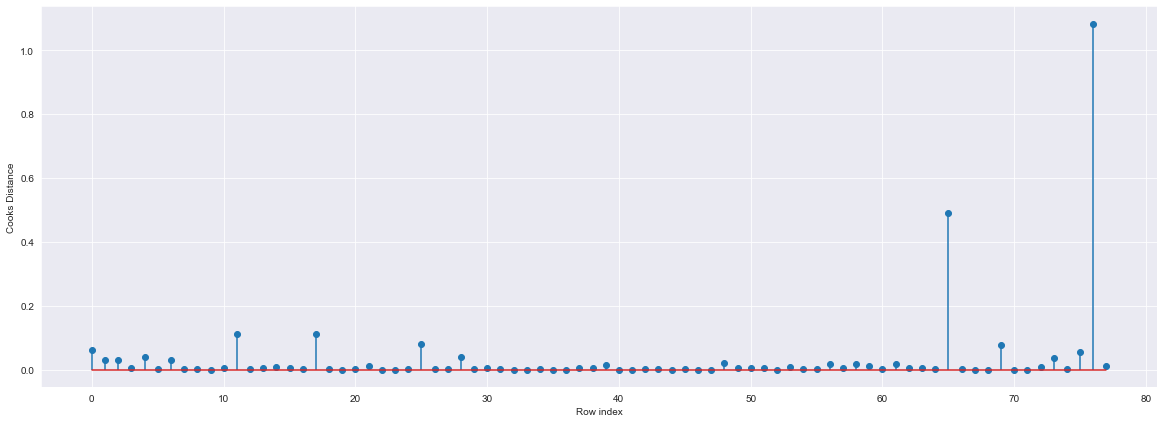

In [91]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [92]:
(np.argmax(c_v),np.max(c_v))

(76, 1.08345920659586)

In [93]:
car5=car4.drop(car4.index[[76]],axis=0)
car5 

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [94]:
car6=car5.reset_index()
car6 

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [95]:
car7=car6.drop(['index'],axis=1)
car7 

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


#### Since the value is <1 , we can stop the diagnostic process and finalize the model


In [96]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car7).fit()

In [97]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8669636111859063, 409.41530627195084)

In [98]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

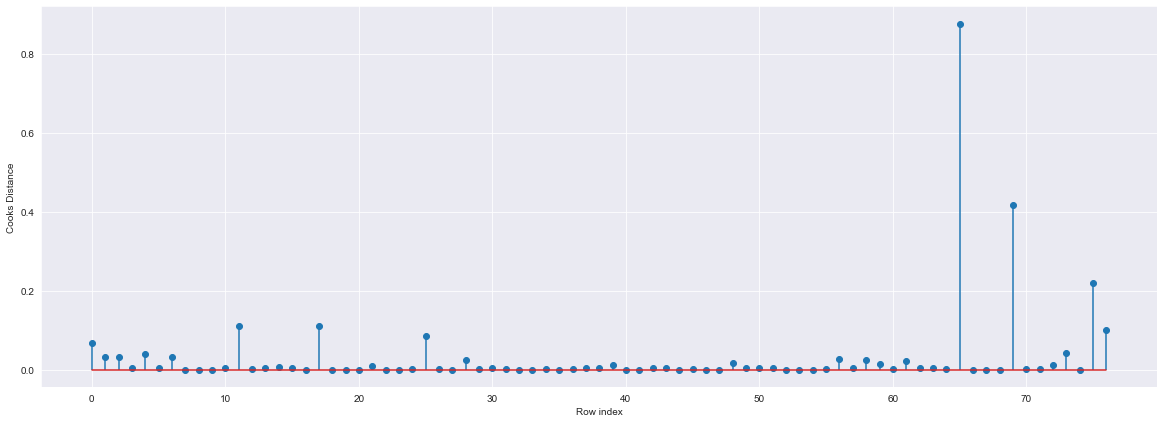

In [99]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [100]:
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296826)

In [102]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102},index=[1])

In [103]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [108]:
final_ml_V.predict(cars.new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [110]:
pred_y = final_ml_V.predict(cars.new)

In [111]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64

In [112]:
car7

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
